In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import tensorflow as tf
print(tf.__version__)


2.8.0


In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df =  pd.read_csv("/content/test.csv")

In [ ]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
print(len(train_df))
train_df = train_df.drop_duplicates('text', keep='last')
print(len(train_df))

7613
7503


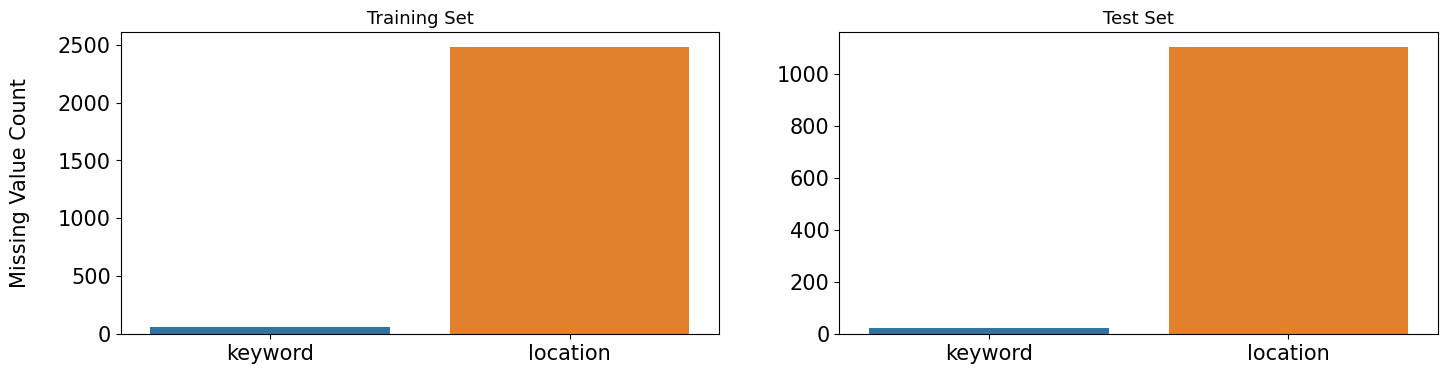

In [ ]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train_df[missing_cols].isnull().sum().index, y=train_df[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test_df[missing_cols].isnull().sum().index, y=test_df[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [train_df, test_df]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

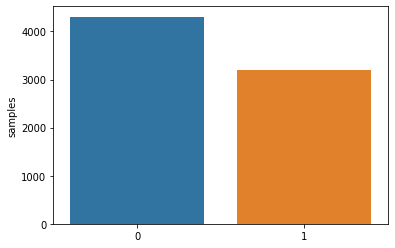

In [ ]:
x=train_df.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [ ]:
train_df['target'].value_counts()

0    4307
1    3196
Name: target, dtype: int64

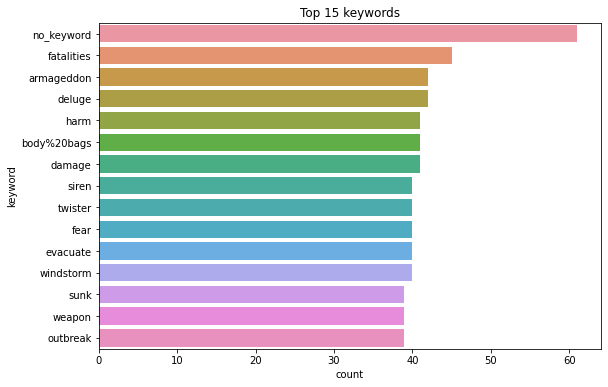

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.countplot(y=train_df.keyword, order = train_df.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

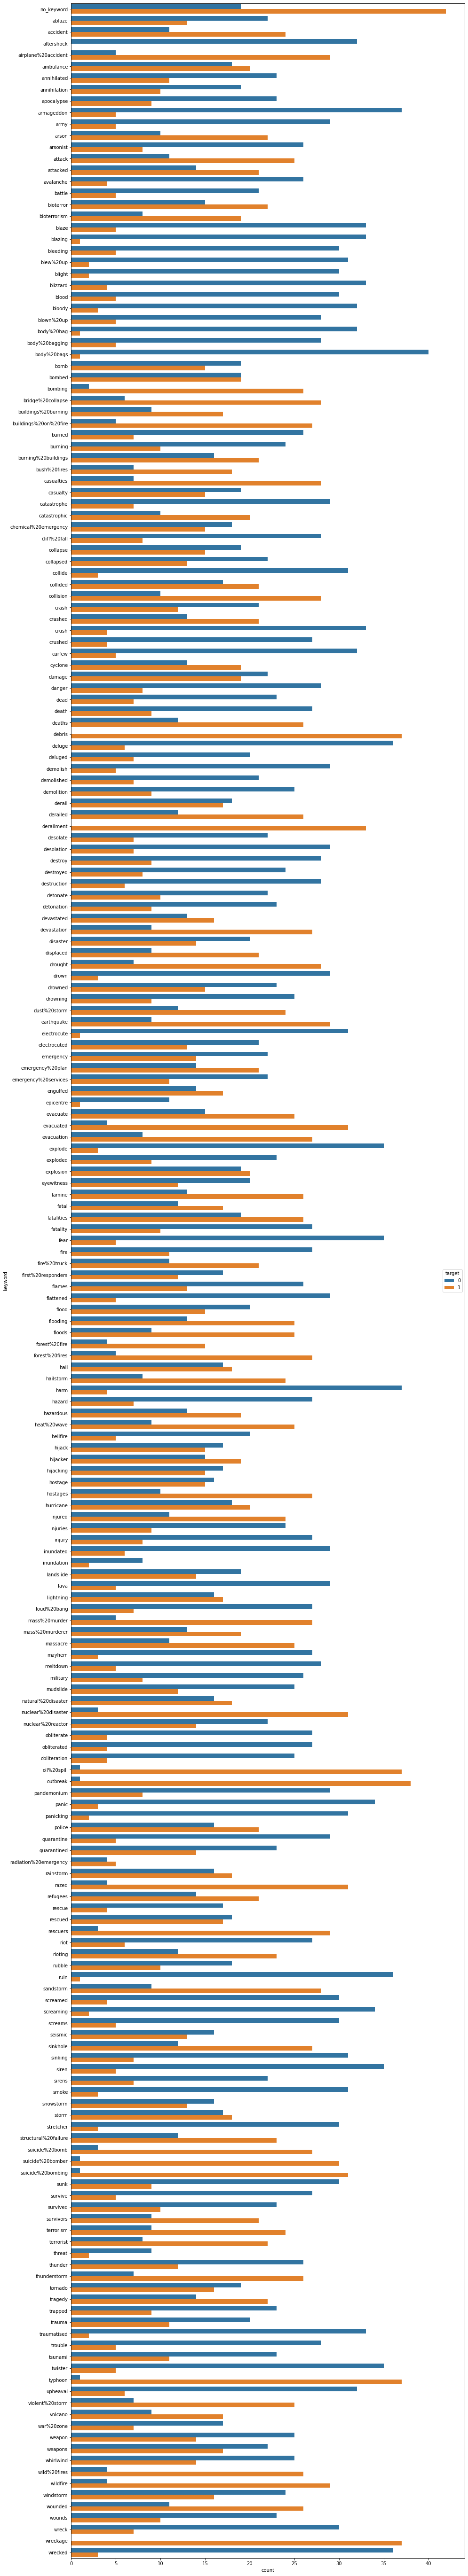

In [ ]:
plt.figure(figsize=(15,100))
sns.countplot(data=train_df, y='keyword', hue='target')

In [ ]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [ ]:
import string
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import re

def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    #lowercase
    text  = text.lower()
    return text

In [ ]:
train_df['text'].apply(lambda x: preprocess_text(x))
train_df.head()

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df.head(15)


,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
5,8,no_keyword,no_location,#RockyFire Update => California Hwy. 20 closed...,1
6,10,no_keyword,no_location,#flood #disaster Heavy rain causes flash flood...,1
7,13,no_keyword,no_location,I'm on top of the hill and I can see a fire in...,1
8,14,no_keyword,no_location,There's an emergency evacuation happening now ...,1
9,15,no_keyword,no_location,I'm afraid that the tornado is coming to our a...,1


In [ ]:
#!pip install -U tensorflow_text==2.3

In [ ]:
!pip install -q tf-models-official==2.3

     |████████████████████████████████| 840 kB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 47.8 MB 2.4 MB/s 
     |████████████████████████████████| 99 kB 7.2 MB/s 
     |████████████████████████████████| 237 kB 40.3 MB/s 
     |████████████████████████████████| 1.1 MB 43.3 MB/s 
     |████████████████████████████████| 352 kB 36.8 MB/s 
     |████████████████████████████████| 462 kB 46.9 MB/s 


In [ ]:
!pip install tensorflow-text
!pip install tf-models-official

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official import nlp
from official.nlp import optimization

     |████████████████████████████████| 4.9 MB 5.4 MB/s 


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df['text'].tolist(),\
                                                      train_df['target'].tolist(),\
                                                      test_size=0.05,\
                                                      stratify = train_df['target'].tolist(),\
                                                      random_state=0)


In [ ]:
batch_size = 32
seed = 42
train_ds = tf.data.Dataset.from_tensor_slices((train_df['text'].tolist(),train_df['target'].tolist())).batch(batch_size)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,y_valid)).batch(batch_size)
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:


bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    }

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    '}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation= "sigmoid" , name='classifier')(net)
  return tf.keras.Model(text_input, net)

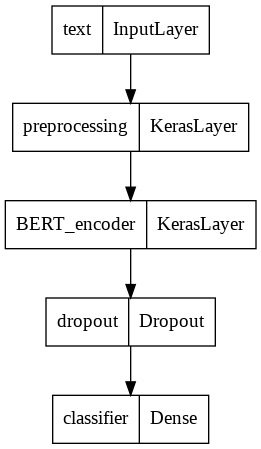

In [ ]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds, validation_data=valid_ds, epochs=epochs)
history = classifier_model.fit(x=train_ds, epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 446s 2s/step - loss: 0.5360 - binary_accuracy: 0.7461 - val_loss: 0.3455 - val_binary_accuracy: 0.8644
Epoch 2/5
235/235 [==============================] - 419s 2s/step - loss: 0.3631 - binary_accuracy: 0.8510 - val_loss: 0.2655 - val_binary_accuracy: 0.9176
Epoch 3/5
235/235 [==============================] - 420s 2s/step - loss: 0.2658 - binary_accuracy: 0.8996 - val_loss: 0.1927 - val_binary_accuracy: 0.9362
Epoch 4/5
235/235 [==============================] - 420s 2s/step - loss: 0.1833 - binary_accuracy: 0.9320 - val_loss: 0.1029 - val_binary_accuracy: 0.9574
Epoch 5/5
235/235 [==============================] - 420s 2s/step - loss: 0.1282 - binary_accuracy: 0.9536 - val_loss: 0.0845 - val_binary_accuracy: 0.9734
Epoch 1/5
235/235 [==============================] - 412s 2s/step - loss: 0.1065 - binary_accuracy: 0.9611
Epoch 2/5
235/235 [==============================] - 411s 2s/step - loss: 0.1046 - binary_accuracy: 0.9613
Epoch 3/5
235/23

In [ ]:
model_loss = pd.DataFrame(classifier_model.history.history)
model_loss.head()

,loss,binary_accuracy
0,0.106476,0.961082
1,0.104600,0.961349
2,0.105169,0.962148
3,0.107951,0.960016
4,0.106803,0.961749


In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])

In [ ]:
probs = classifier_model.predict(test_df["text"]) 
threshold = 0.4
preds = np.where(probs[:,] > threshold, 1, 0)

In [ ]:
print(preds)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


#Model Evalution

In [ ]:
classifier_model.evaluate(X_valid,  y_valid)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 9s 661ms/step - loss: 0.0845 - binary_accuracy: 0.9734


[0.08451144397258759, 0.9734042286872864]

#Classification Report

In [ ]:
import numpy as np
y_predicted = classifier_model.predict(X_valid)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_valid, y_predicted)
matrix

array([[210,   6],
       [  4, 156]])

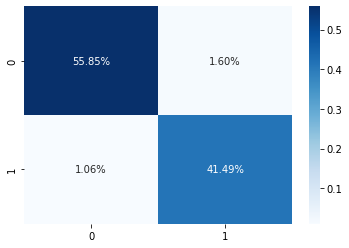

In [ ]:
import seaborn as sns
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_valid, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       216
           1       0.96      0.97      0.97       160

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



#Multinominal Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_pred = model1.predict(X_valid)
print(f"{classification_report(y_valid, y_pred)}")

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       216
           1       0.90      0.62      0.74       160

    accuracy                           0.81       376
   macro avg       0.84      0.79      0.80       376
weighted avg       0.83      0.81      0.80       376

